<a href="https://colab.research.google.com/github/vasanthk99/Assignment_3/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive
from google.colab import files

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  

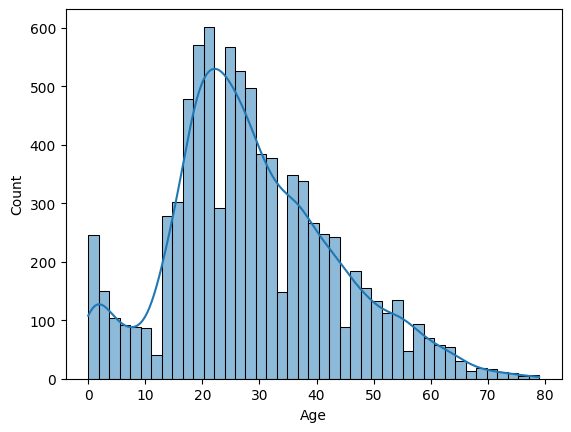

In [ ]:
# Load data
train_df = pd.read_csv('/content/drive/MyDrive/spaceship-titanic/spaceship-titanic/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/spaceship-titanic/spaceship-titanic/test.csv')

# Check column names
print(train_df.columns)
print(test_df.columns)

# Exploratory Data Analysis (EDA)
train_df.info()
train_df.describe()

# Visualize distributions
sns.histplot(train_df['Age'], kde=True)
plt.show()

In [ ]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
zero_mask = train_df['Age'] == 0

# Count the number of zeros in the 'Age' column
num_zeros = zero_mask.sum()
print(f"Number of zeros in 'Age' column: {num_zeros}")

Number of zeros in 'Age' column: 178


In [ ]:
numeric_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
imputer = SimpleImputer(strategy='mean')

Does the Age column have any 0 values? True


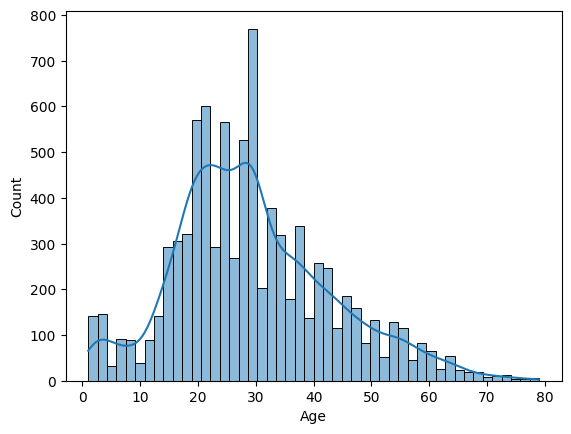

In [ ]:
has_zero = (train_df['Age'] == 0).any()
print(f"Does the Age column have any 0 values? {has_zero}")
train_df['Age'] = train_df['Age'].replace(0, np.nan)
train_df['Age'] = imputer.fit_transform(train_df[['Age']]).ravel()

# Visualize distributions
sns.histplot(train_df['Age'], kde=True)
plt.show()

In [ ]:
for feature in numeric_features:
    has_nan = train_df[feature].isna().any()
    print(f"Does the '{feature}' column before imputer have any NaN values? {has_nan}")
print("\n\n\n")
train_df[numeric_features] = imputer.fit_transform(train_df[numeric_features])


for feature in numeric_features:
    has_nan = train_df[feature].isna().any()
    print(f"Does the '{feature}' column have after imputer any NaN values? {has_nan}")


print(train_df[numeric_features])




Does the 'Age' column before imputer have any NaN values? False
Does the 'RoomService' column before imputer have any NaN values? True
Does the 'FoodCourt' column before imputer have any NaN values? True
Does the 'ShoppingMall' column before imputer have any NaN values? True
Does the 'Spa' column before imputer have any NaN values? True
Does the 'VRDeck' column before imputer have any NaN values? True




Does the 'Age' column have after imputer any NaN values? False
Does the 'RoomService' column have after imputer any NaN values? False
Does the 'FoodCourt' column have after imputer any NaN values? False
Does the 'ShoppingMall' column have after imputer any NaN values? False
Does the 'Spa' column have after imputer any NaN values? False
Does the 'VRDeck' column have after imputer any NaN values? False
       Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0     39.0          0.0        0.0           0.0     0.0     0.0
1     24.0        109.0        9.0          25.0   549.0 

In [ ]:
test_df
has_zero1 = (test_df['Age'] == 0).any()
print(f"Does the Age column have any 0 values? {has_zero1}")

Does the Age column have any 0 values? True


In [ ]:
zero_mask = test_df['Age'] == 0

# Count the number of zeros in the 'Age' column
num_zeros = zero_mask.sum()
print(f"Number of zeros in 'Age' column: {num_zeros}")

Number of zeros in 'Age' column: 82


In [ ]:
test_df['Age'] = test_df['Age'].replace(0, np.nan)
test_df['Age'] = imputer.fit_transform(test_df[['Age']]).ravel()

In [ ]:
for feature1 in numeric_features:
    has_nan_test = test_df[feature1].isna().any()
    print(f"Does the '{feature1}' column before imputer have any NaN values? {has_nan_test}")
print("\n\n\n")
test_df[numeric_features] = imputer.fit_transform(test_df[numeric_features])


for feature1 in numeric_features:
    has_nan_test = test_df[feature1].isna().any()
    print(f"Does the '{feature1}' column have after imputer any NaN values? {has_nan_test}")

Does the 'Age' column before imputer have any NaN values? False
Does the 'RoomService' column before imputer have any NaN values? True
Does the 'FoodCourt' column before imputer have any NaN values? True
Does the 'ShoppingMall' column before imputer have any NaN values? True
Does the 'Spa' column before imputer have any NaN values? True
Does the 'VRDeck' column before imputer have any NaN values? True




Does the 'Age' column have after imputer any NaN values? False
Does the 'RoomService' column have after imputer any NaN values? False
Does the 'FoodCourt' column have after imputer any NaN values? False
Does the 'ShoppingMall' column have after imputer any NaN values? False
Does the 'Spa' column have after imputer any NaN values? False
Does the 'VRDeck' column have after imputer any NaN values? False


In [ ]:
has_nan_HomePlanet = train_df['HomePlanet'].isna().any()
print(f"Does the HomePlanet column before imputer have any NaN values? {has_nan_HomePlanet}")

Does the HomePlanet column before imputer have any NaN values? True


In [ ]:

categorical_features = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
# Initialize the SimpleImputer for the categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')


In [ ]:
# Impute missing values for categorical features in both training and test sets
for feature_cat in categorical_features:
    has_nan_train_cat = train_df[feature_cat].isna().any()
    print(f"Does the '{feature_cat}' column Train before imputer have any NaN values? {has_nan_train_cat}")
    has_nan_test_cat = test_df[feature_cat].isna().any()
    print(f"Does the '{feature_cat}' column Test before imputer have any NaN values? {has_nan_test_cat}")


print("\n\n\n")
train_df[categorical_features] = categorical_imputer.fit_transform(train_df[categorical_features])
test_df[categorical_features] = categorical_imputer.transform(test_df[categorical_features])

# Impute missing values for categorical features in both training and test sets
for feature_cat in categorical_features:
    has_nan_train_cat = train_df[feature_cat].isna().any()
    print(f"Does the '{feature_cat}' column Train before imputer have any NaN values? {has_nan_train_cat}")
    has_nan_test_cat = test_df[feature_cat].isna().any()
    print(f"Does the '{feature_cat}' column Test before imputer have any NaN values? {has_nan_test_cat}")

Does the 'HomePlanet' column Train before imputer have any NaN values? True
Does the 'HomePlanet' column Test before imputer have any NaN values? True
Does the 'CryoSleep' column Train before imputer have any NaN values? True
Does the 'CryoSleep' column Test before imputer have any NaN values? True
Does the 'Cabin' column Train before imputer have any NaN values? True
Does the 'Cabin' column Test before imputer have any NaN values? True
Does the 'Destination' column Train before imputer have any NaN values? True
Does the 'Destination' column Test before imputer have any NaN values? True
Does the 'VIP' column Train before imputer have any NaN values? True
Does the 'VIP' column Test before imputer have any NaN values? True




Does the 'HomePlanet' column Train before imputer have any NaN values? False
Does the 'HomePlanet' column Test before imputer have any NaN values? False
Does the 'CryoSleep' column Train before imputer have any NaN values? False
Does the 'CryoSleep' column Test bef

In [ ]:
# Convert the imputed arrays back to DataFrames
train_df[categorical_features] = pd.DataFrame(train_df[categorical_features], columns=categorical_features)
test_df[categorical_features] = pd.DataFrame(test_df[categorical_features], columns=categorical_features)
categorical_features_new = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Check if 'Cabin' column is present in both datasets
train_has_cabin = 'Cabin' in train_df.columns
test_has_cabin = 'Cabin' in test_df.columns

if train_has_cabin and test_has_cabin:
    # Feature Engineering: Extract deck, num, and side from Cabin in both training and test sets
    train_df[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = train_df['Cabin'].str.split('/', expand=True)
    test_df[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = test_df['Cabin'].str.split('/', expand=True)

    # Drop the original Cabin column in both sets
    train_df = train_df.drop(columns=['Cabin'])
    test_df = test_df.drop(columns=['Cabin'])

    # Convert Cabin_num to numeric in both sets
    train_df['Cabin_num'] = pd.to_numeric(train_df['Cabin_num'], errors='coerce')
    test_df['Cabin_num'] = pd.to_numeric(test_df['Cabin_num'], errors='coerce')

    # Replace zero values in Cabin_num with NaN
    train_df['Cabin_num'] = train_df['Cabin_num'].replace(0, np.nan)
    test_df['Cabin_num'] = test_df['Cabin_num'].replace(0, np.nan)

    # Initialize the SimpleImputer for numeric features
    numeric_imputer = SimpleImputer(strategy='mean')

    # Impute missing values in Cabin_num for both sets
    train_df['Cabin_num'] = numeric_imputer.fit_transform(train_df[['Cabin_num']])
    test_df['Cabin_num'] = numeric_imputer.transform(test_df[['Cabin_num']])

    # One-Hot encode the new categorical features in both sets
    train_df = pd.get_dummies(train_df, columns=['Cabin_deck', 'Cabin_side'], drop_first=True)
    test_df = pd.get_dummies(test_df, columns=['Cabin_deck', 'Cabin_side'], drop_first=True)

# One-hot encode the categorical features
train_df = pd.get_dummies(train_df, columns=categorical_features_new, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_features_new, drop_first=True)

# Ensure both train and test sets have the same columns after one-hot encoding
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0
test_df = test_df[train_df.columns.drop('Transported')]  # Drop 'Transported' since it's not in the test set

# Split the training data into features and target
X_train = train_df.drop(columns=['PassengerId', 'Transported', 'Name'])
y_train = train_df['Transported']

# Prepare the test set features
X_test = test_df.drop(columns=['PassengerId', 'Name'])

# Verify the feature columns match
print("Columns in X_train:", X_train.columns.tolist())
print("Columns in X_test:", X_test.columns.tolist())


Columns in X_train: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num', 'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_deck_T', 'Cabin_side_S', 'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_True']
Columns in X_test: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num', 'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_deck_T', 'Cabin_side_S', 'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_True']


In [ ]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import time

# Assuming train_df and test_df have been preprocessed as shown in the previous steps
# Ensure to run the preprocessing code before this

# Train-test split for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_split, y_train_split)

# Evaluate the model using cross-validation
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {cross_val_scores.mean()}")
# Measure the time taken to train the model
start_time = time.time()

# Train the model
model.fit(X_train_split, y_train_split)

end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")

# (Optional) Evaluate on the validation set
val_score = model.score(X_val, y_val)
print(f"Validation score: {val_score}")

# Make predictions on the test set
test_predictions = model.predict(X_test)

# Load the original test dataset to get the PassengerId
original_test_df = pd.read_csv('/content/drive/MyDrive/spaceship-titanic/spaceship-titanic/test.csv')

# Create a DataFrame for submission
submission = pd.DataFrame({
    'PassengerId': original_test_df['PassengerId'],
    'Transported': test_predictions
})

# Convert boolean to the required format (e.g., True/False to 1/0 or any other required format)
submission['Transported'] = submission['Transported'].astype(bool)

# Save the submission to a CSV file
submission.to_csv('submission_rand.csv', index=False)
print("Submission file created: submission.csv")
# Download the submission file
files.download('submission_rand.csv')

Cross-validation scores: [0.76078206 0.75503163 0.80276021 0.81875719 0.78250863]
Mean cross-validation score: 0.7839679431653577
Training time: 0.7676374912261963 seconds
Validation score: 0.7866589994249569
Submission file created: submission.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
'''
#compare 4 models

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Define models and their parameters
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42)
}

param_grids = {
    "RandomForest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "GradientBoosting": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.05],
        'max_depth': [3, 5, 7]
    },
    "XGBoost": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.05],
        'max_depth': [3, 5, 7]
    },
    "LightGBM": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.05],
        'max_depth': [-1, 10, 20]
    }
}

# Function to perform grid search and return the best model
def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model.__class__.__name__}: {grid_search.best_score_}")
    return grid_search.best_estimator_

# Train and evaluate each model
best_models = {}
for model_name in models.keys():
    print(f"Training {model_name}...")
    best_model = perform_grid_search(models[model_name], param_grids[model_name], X_train, y_train)
    best_models[model_name] = best_model

# Evaluate on the validation set
for model_name, model in best_models.items():
    val_predictions = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    print(f"Validation accuracy for {model_name}: {val_accuracy}")

# Choose the best model and make predictions on the test set
best_model_name = max(best_models, key=lambda name: accuracy_score(y_val, best_models[name].predict(X_val)))
best_model = best_models[best_model_name]
print(f"Best model: {best_model_name}")

# Make predictions on the test set
test_predictions = best_model.predict(X_test)

# Create a submission file
submission = pd.DataFrame({
    'PassengerId': original_test_df['PassengerId'],
    'Transported': test_predictions
})
submission['Transported'] = submission['Transported'].astype(bool)
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")



'''

In [ ]:
'''
# Feature engineering: Create new features based on existing ones
train_df['TotalSpend'] = train_df['RoomService'] + train_df['FoodCourt'] + train_df['ShoppingMall'] + train_df['Spa'] + train_df['VRDeck']
test_df['TotalSpend'] = test_df['RoomService'] + test_df['FoodCourt'] + test_df['ShoppingMall'] + test_df['Spa'] + test_df['VRDeck']

# Normalize or scale features if necessary
scaler = StandardScaler()
train_df[numeric_features + ['TotalSpend']] = scaler.fit_transform(train_df[numeric_features + ['TotalSpend']])
test_df[numeric_features + ['TotalSpend']] = scaler.transform(test_df[numeric_features + ['TotalSpend']])

# Split the training data into features and target
X_train = train_df.drop(columns=['PassengerId', 'Transported', 'Name'])
y_train = train_df['Transported']

# Prepare the test set features
X_test = test_df.drop(columns=['PassengerId', 'Name'])

# Ensure no NaNs
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Train-test split for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define individual models
rf_model = RandomForestClassifier(random_state=42, max_depth=10, min_samples_split=2, n_estimators=200)
gb_model = GradientBoostingClassifier(random_state=42, learning_rate=0.05, max_depth=3, n_estimators=200)
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', learning_rate=0.05, max_depth=3, n_estimators=300)
lgbm_model = LGBMClassifier(random_state=42, learning_rate=0.01, max_depth=-1, n_estimators=300)

# Train individual models
rf_model.fit(X_train_split, y_train_split)
gb_model.fit(X_train_split, y_train_split)
xgb_model.fit(X_train_split, y_train_split)
lgbm_model.fit(X_train_split, y_train_split)

# Define and train the voting classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('xgb', xgb_model),
    ('lgbm', lgbm_model)
], voting='soft')
voting_clf.fit(X_train_split, y_train_split)

# Evaluate the voting classifier on the validation set
val_score_voting = voting_clf.score(X_val, y_val)
print(f"Validation score for Voting Classifier: {val_score_voting}")

# Hyperparameter tuning with Bayesian optimization for XGBoost
def objective(params):
    params['max_depth'] = int(params['max_depth'])
    params['n_estimators'] = int(params['n_estimators'])
    clf = xgb.XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss')
    score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    return {'loss': -score, 'status': STATUS_OK}

space = {
    'max_depth': scope.int(hp.quniform('max_depth', 3, 10, 1)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'n_estimators': scope.int(hp.quniform('n_estimators', 100, 500, 50)),
    'gamma': hp.uniform('gamma', 0, 0.5),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1)
}

trials = Trials()
best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)
print(f"Best parameters found: {best_params}")

# Convert float values to int for certain parameters
best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])

# Train the best XGBoost model
best_xgb_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
best_xgb_model.fit(X_train, y_train)

# Evaluate on the validation set
val_score_best_xgb = best_xgb_model.score(X_val, y_val)
print(f"Validation score for Best XGBoost: {val_score_best_xgb}")

# Stacking classifier
base_models = [
    ('rf', rf_model),
    ('gb', gb_model),
    ('xgb', xgb_model),
    ('lgbm', lgbm_model)
]
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

stacking_clf.fit(X_train_split, y_train_split)

# Evaluate on the validation set
val_score_stacking = stacking_clf.score(X_val, y_val)
print(f"Validation score for Stacking Classifier: {val_score_stacking}")

# Select the best model based on validation scores
best_model_name = max({
    'Voting Classifier': val_score_voting,
    'Best XGBoost': val_score_best_xgb,
    'Stacking Classifier': val_score_stacking
}, key=lambda name: {
    'Voting Classifier': val_score_voting,
    'Best XGBoost': val_score_best_xgb,
    'Stacking Classifier': val_score_stacking
}[name])

best_model = {
    'Voting Classifier': voting_clf,
    'Best XGBoost': best_xgb_model,
    'Stacking Classifier': stacking_clf
}[best_model_name]

print(f"Best model: {best_model_name}")

# Make predictions on the test set
test_predictions = best_model.predict(X_test)

# Load the original test dataset to get the PassengerId
original_test_df = pd.read_csv('/content/drive/MyDrive/spaceship-titanic/test.csv')

# Create a DataFrame for submission
submission = pd.DataFrame({
    'PassengerId': original_test_df['PassengerId'],
    'Transported': test_predictions
})

# Convert boolean to the required format (e.g., True/False to 1/0 or any other required format)
submission['Transported'] = submission['Transported'].astype(bool)

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")

# Download the submission file
files.download('submission.csv')

'''